https://github.com/NanoComp/meep/blob/master/python/examples/straight-waveguide.ipynb  

https://stackoverflow.com/questions/29454002/filenotfounderror-errno-2-no-such-file-or-directory-ffmpeg


In [2]:
import math
import meep as mp
from meep import mpb

import numpy as np
import matplotlib.pyplot as plt

Using MPI version 3.1, 1 processes


In [38]:
PhC = True
lengthPhC = 20
decay_check=0
T_decay=500

##### setting of parameters #####
a = 1 # CADに移行しやすいように予め設定しておく
widthPhC = 10
ConnectionWaveguide = 5
wgi = 1/2 #/np.sqrt(3)/2
whetero = 1/np.sqrt(3)/4
yshift = 1/(2*np.sqrt(3)) + 1/6*np.sqrt(3)/2*d_0
r = 1/4
d_0 = 0.8*a
n_eff = 2.6
fcen = 0.3 
df = 0.05
nfreq = 500 # number of frequencies at which to compute flux
resolution = 16

#####
length = lengthPhC + 2*ConnectionWaveguide
width = widthPhC
Nx = int(lengthPhC)
Ny = int(widthPhC)
eps = n_eff**2

##### settings of geometry #####
# initialization
cell = mp.Vector3(length,width*np.sqrt(3),0)

# Si waveguide
waveguide = mp.Block(mp.Vector3(mp.inf,wgi*np.sqrt(3),mp.inf),
                        center=mp.Vector3(),
                        material=mp.Medium(epsilon=eps))
geometry = [waveguide]

# PhC
if PhC:
    # triangle
    tri_u = [
            mp.Vector3(-np.sqrt(3)/2,-1/2)*d_0/np.sqrt(3),
            mp.Vector3( np.sqrt(3)/2,-1/2)*d_0/np.sqrt(3),
            mp.Vector3(            0,   1)*d_0/np.sqrt(3),
            ]
    tri_d = [
            mp.Vector3(-np.sqrt(3)/2,-1/2)*d_0/np.sqrt(3)*(-1),
            mp.Vector3( np.sqrt(3)/2,-1/2)*d_0/np.sqrt(3)*(-1),
            mp.Vector3(            0,   1)*d_0/np.sqrt(3)*(-1),
            ]

    # slab
    blk = mp.Block(mp.Vector3(lengthPhC,widthPhC*np.sqrt(3),mp.inf),
                            center=mp.Vector3(),
                            material=mp.Medium(epsilon=eps))

    geometry.append(blk)
    
    # arrange air-holes
    for j in range(Ny):
        for i in range(Nx+1):
            shift_y = np.sqrt(3)
            geometry.append(mp.Prism(tri_u, height = 1, center=mp.Vector3(i-Nx/2, yshift +  1/(2*np.sqrt(3)) + shift_y*j )))
            geometry.append(mp.Prism(tri_d, height = 1, center=mp.Vector3(i-Nx/2, yshift - (1/(2*np.sqrt(3)) + shift_y*j))))

            geometry.append(mp.Prism(tri_u, height = 1, center=mp.Vector3(i-(Nx+1)/2, yshift + 1/(2*np.sqrt(3)) + shift_y*(j+1/2))))
            geometry.append(mp.Prism(tri_d, height = 1, center=mp.Vector3(i-(Nx+1)/2, yshift -(1/(2*np.sqrt(3)) + shift_y*(j+1/2)))))
            #geometry.append(mp.Cylinder(r, center=mp.Vector3(i-N/2,-wgi*np.sqrt(3)/2)))

# Gaussian
sources = [mp.Source(mp.GaussianSource(fcen, fwidth=df),
                        component=mp.Hz,
                        center=mp.Vector3(-length/2 +1,0),
                        size=mp.Vector3(0,wgi*np.sqrt(3)))
            ]

# PML
pml_layers = [mp.PML(1.0)]

# z-symmetry (上下対称なら計算が軽くなる。対称性が無いなら消す)
#sym = [mp.Mirror(mp.Y, phase=-1)]


####
sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    #symmetries=sym,
                    resolution=resolution)


-----------
Initializing structure...
time for choose_chunkdivision = 0.162641 s
Working in 2D dimensions.
Computational cell is 30 x 17.3125 x 0 with resolution 16
     block, center = (0,0,0)
          size (1e+20,0.866025,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (6.76,6.76,6.76)
     block, center = (0,0,0)
          size (20,17.3205,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (6.76,6.76,6.76)
     prism, center = (-10,0.69282,0)
          height 1, axis (0,0,1), sidewall angle: 0 radians, 3 vertices:
          (-10.4,0.46188,-0.5)
          (-9.6,0.46188,-0.5)
          (-10,1.1547,-0.5)
          dielectric constant epsilon diagonal = (1,1,1)
     prism, center = (-10,0.11547,0)
          height 1, axis (0,0,1), sidewall angle: 0 radians, 3 vertices:
          (-9.6,0.34641,-0.5)
          (-10.4,0.34641,-0.5)
          (-10,-0.34641,-0.5)
          dielectric constant epsi

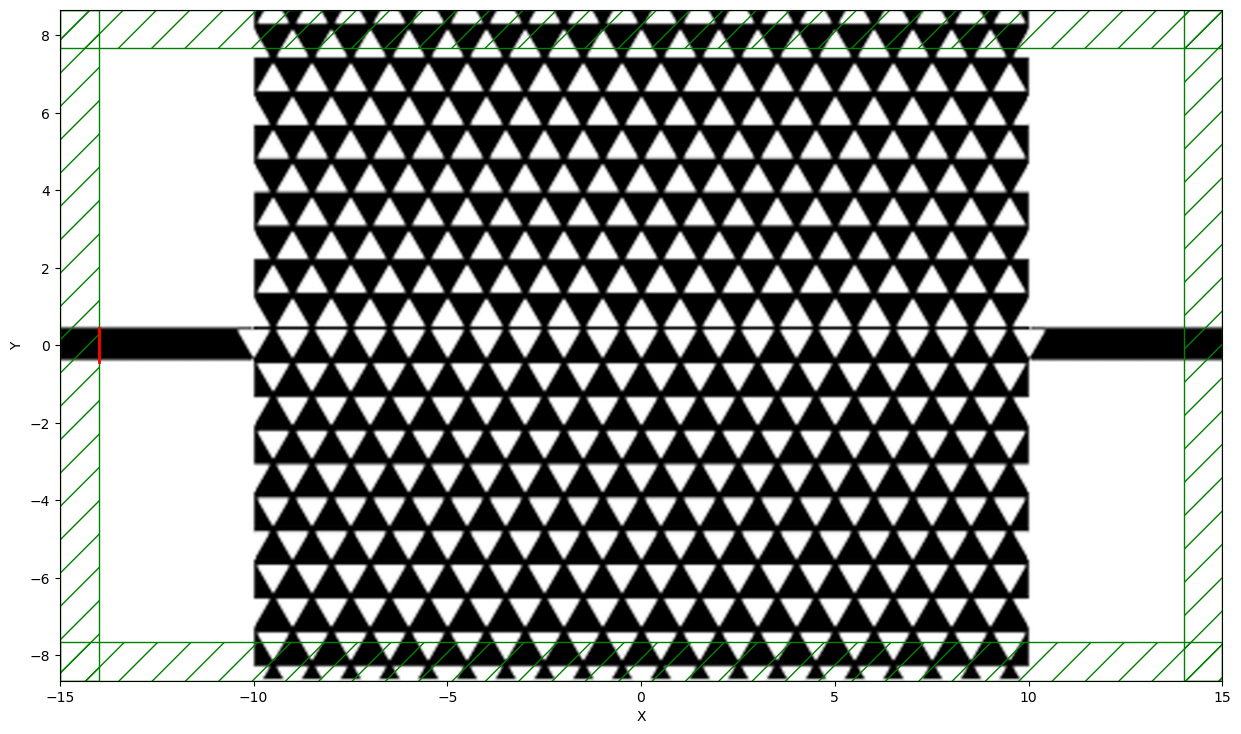

In [39]:
%matplotlib inline
plt.figure(dpi=100, figsize=(15,30))
sim.plot2D()
plt.show()

FloatProgress(value=0.0, description='0% done ')

Meep progress: 37.90625/100.0 = 37.9% done in 4.0s, 6.6s to go
on time step 1224 (time=38.25), 0.00326877 s/step
Meep progress: 72.90625/100.0 = 72.9% done in 8.0s, 3.0s to go
on time step 2339 (time=73.0938), 0.00358919 s/step
run 0 finished at t = 100.0 (3200 timesteps)


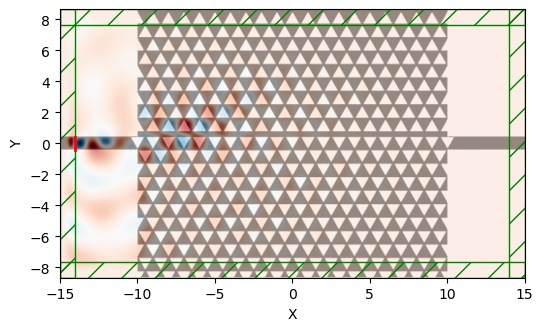

In [30]:
sim.run(until=100)

plt.figure(dpi=100)
sim.plot2D(fields=mp.Hz)
plt.show()

In [31]:
T=1

sim.reset_meep()
f = plt.figure(dpi=100)
Animate = mp.Animate2D(sim, fields=mp.Hz, f=f, realtime=False, normalize=True)
sim.run(mp.at_every(T,Animate),until=T*300)
plt.close()

-----------
Initializing structure...
time for choose_chunkdivision = 0.0896981 s
Working in 2D dimensions.
Computational cell is 30 x 17.3125 x 0 with resolution 16
     block, center = (0,0,0)
          size (1e+20,0.866025,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (6.76,6.76,6.76)
     block, center = (0,0,0)
          size (20,17.3205,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (6.76,6.76,6.76)
     prism, center = (-10,1.01036,0)
          height 1, axis (0,0,1), sidewall angle: 0 radians, 3 vertices:
          (-10.4,0.779423,-0.5)
          (-9.6,0.779423,-0.5)
          (-10,1.47224,-0.5)
          dielectric constant epsilon diagonal = (1,1,1)
     prism, center = (-10,0.144338,0)
          height 1, axis (0,0,1), sidewall angle: 0 radians, 3 vertices:
          (-9.6,0.375278,-0.5)
          (-10.4,0.375278,-0.5)
          (-10,-0.317543,-0.5)
          dielectric const

FloatProgress(value=0.0, description='0% done ', max=300.0)

Meep progress: 22.125/300.0 = 7.4% done in 4.0s, 50.2s to go
on time step 713 (time=22.2812), 0.00561619 s/step
Meep progress: 62.40625/300.0 = 20.8% done in 8.0s, 30.5s to go
on time step 2004 (time=62.625), 0.00309985 s/step
Meep progress: 97.625/300.0 = 32.5% done in 12.0s, 24.9s to go
on time step 3128 (time=97.75), 0.00356273 s/step
Meep progress: 133.25/300.0 = 44.4% done in 16.0s, 20.0s to go
on time step 4274 (time=133.562), 0.00349187 s/step
Meep progress: 165.0/300.0 = 55.0% done in 20.0s, 16.4s to go
on time step 5288 (time=165.25), 0.0039483 s/step
Meep progress: 203.0/300.0 = 67.7% done in 24.0s, 11.5s to go
on time step 6505 (time=203.281), 0.00328869 s/step
Meep progress: 249.78125/300.0 = 83.3% done in 28.0s, 5.6s to go
on time step 8000 (time=250), 0.00267965 s/step
Meep progress: 295.0/300.0 = 98.3% done in 32.0s, 0.5s to go
on time step 9447 (time=295.219), 0.00276518 s/step
Normalizing field data...
run 1 finished at t = 300.0 (9600 timesteps)


In [12]:
#Animate.to_gif(10,"test.gif")

filename = "straight_waveguide.mp4"
Animate.to_mp4(10,filename)

Generating MP4...


In [13]:
from IPython.display import Video
Video(filename)

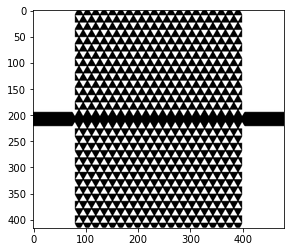

In [10]:
eps_data = sim.get_array(center=mp.Vector3(), size=cell, component=mp.Dielectric)
plt.figure()
plt.imshow(eps_data.transpose(), interpolation='spline36', cmap='binary')
#plt.axis('off')
plt.show()

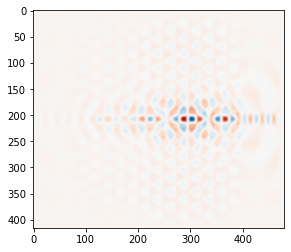

In [11]:
hz_data = sim.get_array(center=mp.Vector3(), size=cell, component=mp.Hz)
plt.figure()
#plt.imshow(eps_data.transpose(), interpolation='spline36', cmap='binary')
plt.imshow(hz_data.transpose(), interpolation='spline36', cmap='RdBu', alpha=0.9)
#plt.axis('off')
plt.show()

In [14]:
%pwd

'/mnt/c/Users/fkh/.vscode/extensions/ms-vscode-remote.remote-wsl-0.50.1'